In [5]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('Final_Cleaned.csv', encoding='utf-8', sep=';')
df['property_type']= df['property_type'].replace("Ejerlejlighed", "Apartment")


def format_thousands(x, pos):
    return '{:,.0f}'.format(x).replace(',', '.')


Q1 = df['price'].quantile(0.025)
Q3 = df['price'].quantile(0.975)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outlier values
df = df[(df['price'] <= upper_bound)]
df

,price,city,energy,area,land area,rooms,ejerudg,days active,latitude,longitude,...,distance to Odense,distance to city,closest city,residents,municipal,municipal tax rate,grundskyldspromille,property_type,sqm_price,Age
0,5195000.0,Valby,D,82.0,563.0,5.0,4894.0,87.0,55.652068,12.498816,...,136.137958,5.126456,Copenhagen,644431.0,Københavns,23.70,34.00,Villa,63353.658537,73.0
1,2595000.0,Sommersted,D,192.0,20011.0,7.0,2077.0,6.0,55.359367,9.255736,...,72.075634,72.075634,Odense,55340.0,Haderslev,26.30,24.36,Villa,13515.625000,93.0
2,3495000.0,Greve,D,116.0,794.0,4.0,3725.0,33.0,55.580640,12.286512,...,121.572639,20.688457,Copenhagen,50818.0,Greve,24.42,16.94,Villa,30129.310345,57.0
3,4500000.0,Borup,B,159.0,833.0,5.0,2862.0,229.0,55.492244,11.986446,...,101.536701,42.015572,Copenhagen,61718.0,Køge,25.26,21.04,Villa,28301.886792,15.0
4,1245000.0,Fredericia,D,157.0,1075.0,6.0,2101.0,105.0,55.540579,9.610832,...,51.888689,51.888689,Odense,51606.0,Fredericia,25.50,26.00,Villa,7929.936306,123.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26522,1695000.0,Hovedgård,C,78.0,828.0,2.0,1816.0,174.0,55.947943,9.964381,...,67.034720,28.205003,Aarhus,94443.0,Horsens,25.39,22.56,Villa,21730.769231,73.0
26523,695000.0,Faaborg,D,144.0,1028.0,4.0,1610.0,404.0,55.234210,10.476905,...,18.842811,18.842811,Odense,51849.0,Faaborg-Midtfyn,26.10,22.85,Villa,4826.388889,75.0
26524,695000.0,Bagenkop,E,112.0,700.0,4.0,1278.0,174.0,54.747589,10.674032,...,74.437042,74.437042,Odense,12316.0,Langeland,26.30,24.57,Villa,6205.357143,62.0
26525,1750000.0,Aabybro,C,198.0,696.0,7.0,2146.0,174.0,57.160593,9.735930,...,200.602518,16.770336,Aalborg,38187.0,Jammerbugt,25.70,32.85,Villa,8838.383838,56.0


In [95]:
from tabulate import tabulate

tab = df.describe()

# Convert the DataFrame to a LaTeX table
table = tabulate(tab.loc[:,['price','area','rooms','distance to city','sqm_price','Age']], headers='keys', tablefmt='latex_raw', floatfmt=".2f")

# Print the LaTeX table
print(table)

\begin{tabular}{lrrrrrr}
\hline
       &       price &     area &    rooms &   distance to city &   sqm_price &      Age \\
\hline
 count &    26466.00 & 26466.00 & 26466.00 &           26466.00 &    26466.00 & 26466.00 \\
 mean  &  2953290.13 &   145.82 &     4.63 &              38.00 &    21885.83 &    76.53 \\
 std   &  2766180.30 &    64.78 &     1.80 &              26.31 &    17997.38 &    53.88 \\
 min   &    95000.00 &    16.00 &     1.00 &               0.07 &      805.08 &    -2.00 \\
 25%   &  1295000.00 &   104.00 &     3.00 &              14.31 &     9113.25 &    48.00 \\
 50%   &  2175000.00 &   137.00 &     4.00 &              36.67 &    16112.01 &    65.00 \\
 75%   &  3695000.00 &   175.00 &     6.00 &              57.84 &    28934.43 &   103.00 \\
 max   & 26500000.00 &   790.00 &    20.00 &              99.99 &   187878.79 &   823.00 \\
\hline
\end{tabular}


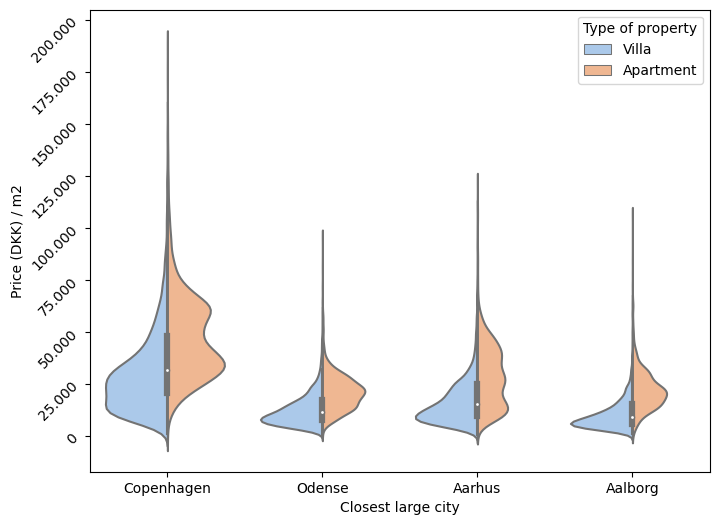

In [97]:
sns.set_palette("pastel")


# Format y-axis labels with thousand separators
formatter = mticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x).replace(',', '.'))

ax = sns.violinplot(x='closest city', y='sqm_price',hue='property_type',split=True, data=df)
ax.set_ylabel('Price (DKK) / m2') # Choose title for plot
ax.set_xlabel('Closest large city') # Choose title for 'plot'
ax.yaxis.set_major_formatter(formatter)
plt.yticks(rotation = 45)
#ax.set(ylim=(0, 120000))
ax.legend(title="Type of property")
figure = plt.gcf()

figure.set_size_inches(8, 6)
# when saving, specify the DPI
plt.savefig('price_per_m2_plot_new.png',dpi=100)

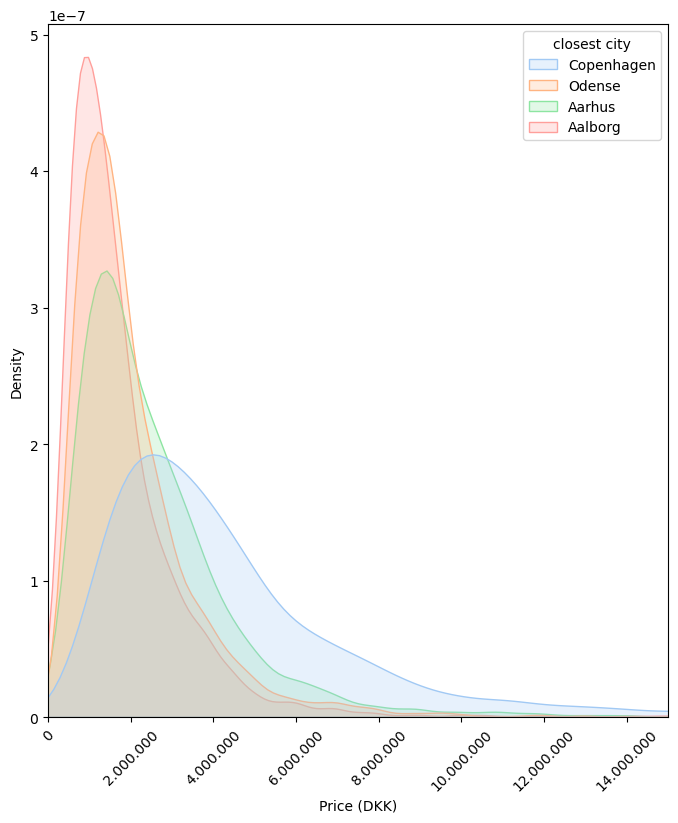

In [98]:

# Format y-axis labels with thousand separators
formatter = mticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x).replace(',', '.'))


#fig, ax = plt.subplots()
ax = sns.kdeplot(df, x="price", hue="closest city", fill=True,common_norm=False)
ax.set_xlim(0, 15000000)
ax.xaxis.set_major_formatter(formatter)
plt.xticks(rotation = 45)
ax.set_xlabel('Price (DKK)')
figure = plt.gcf()

figure.set_size_inches(8, 9)
# when saving, specify the DPI
plt.savefig('price_density.png',dpi=100)

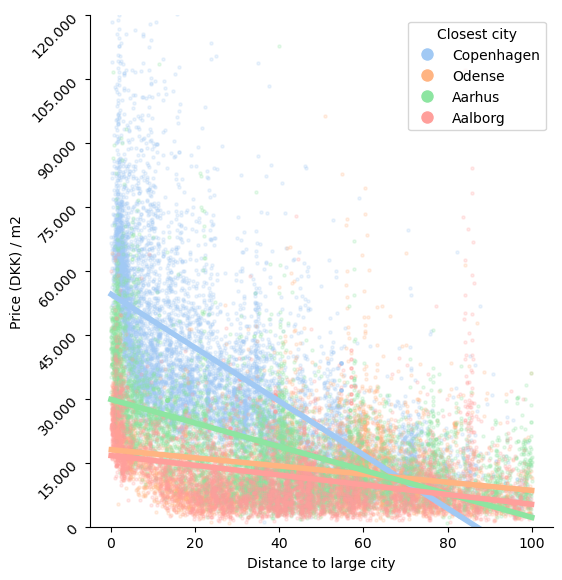

In [105]:

#ax = sns.relplot(data=df, x="distance to city", y="sqm_price",hue='closest city')
ax = sns.lmplot(
    data=df,
    x="distance to city", y="sqm_price", hue="closest city", scatter_kws={'alpha': 0.2,'s': 5,'marker':'o'},line_kws={'linewidth': 4},
    height=5
)
# Adjust marker opacity (alpha)
# You can adjust the alpha value as needed

ax.set_axis_labels("Distance to large city", "Price (DKK) / m2")
# Choose title for 'plot'
# Apply the custom formatter to the y-axis
ax.set_yticklabels(['{:,.0f}'.format(x) for x in ax.ax.yaxis.get_majorticklocs()])
ax.ax.yaxis.set_major_formatter(mticker.FuncFormatter(format_thousands))
plt.yticks(rotation = 45)
ax._legend.set_title("Closest city")
ax.set(ylim=(0, 120000))
# Set new y-axis tick positions
new_y_ticks = [0, 15000, 30000, 45000, 60000, 75000, 90000,105000,120000]
ax.ax.yaxis.set_ticks(new_y_ticks)
#legend = ax._legend

#sns.move_legend(ax, "upper left", bbox_to_anchor=(0.5, 1))


# when saving, specify the DPI

# Remove the default legend
ax._legend.remove()

# Create custom legend handles with increased marker size
legend_patches = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=day)
    for color, day in zip(ax._colors, df['closest city'].unique())
]
# Add the custom legend to the plot
plt.legend(handles=legend_patches, title='Closest city', loc='upper right')
figure = plt.gcf()

figure.set_size_inches(8, 6)

plt.savefig('price_to_distance.png',dpi=100)

# Plot sepal width as a function of sepal_length across days


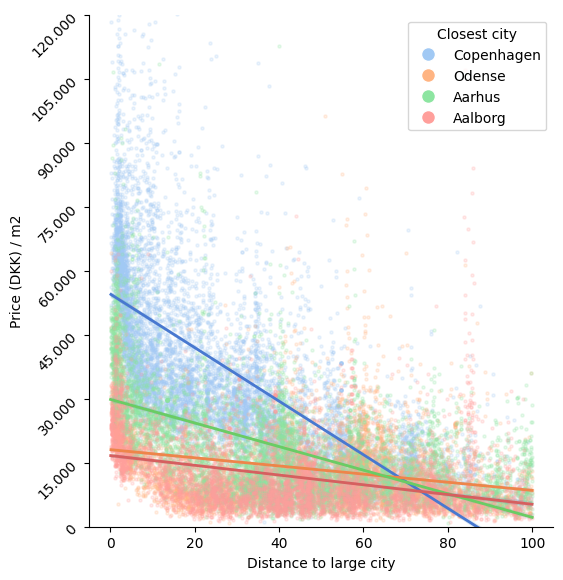

In [23]:
# 1. Get the 'pastel' colors for the number of unique cities.
pastel_colors = sns.color_palette("pastel", len(df['closest city'].unique()))

# 2. Create darker versions of these colors for the lines.
darkened_colors = sns.color_palette("muted", len(df['closest city'].unique())) #[sns.dark_palette(color, n_colors=4)[2] for color in pastel_colors]

# Create a dictionary mapping cities to pastel colors for the scatter points
scatter_color_dict = dict(zip(df['closest city'].unique(), pastel_colors))

# Create a dictionary mapping cities to darker colors for the regression lines
line_color_dict = dict(zip(df['closest city'].unique(), darkened_colors))

ax = sns.lmplot(
    data=df,
    x="distance to city", y="sqm_price", hue="closest city", 
    palette=scatter_color_dict,  # Use pastel colors for scatter points
    scatter_kws={'alpha': 0.2, 's': 5, 'marker': 'o'},
    line_kws={'linewidth': 2, 'color': None},  # Set color to None for now; we'll adjust it next
    height=5
)

# 3. Adjust the line colors manually
for i, line in enumerate(ax.axes.flat[0].lines):
    line.set_color(darkened_colors[i])

# ... Rest of your code 
# ... Rest of your code ...
# Adjust marker opacity (alpha)
# You can adjust the alpha value as needed

ax.set_axis_labels("Distance to large city", "Price (DKK) / m2")
# Choose title for 'plot'
# Apply the custom formatter to the y-axis
ax.set_yticklabels(['{:,.0f}'.format(x) for x in ax.ax.yaxis.get_majorticklocs()])
ax.ax.yaxis.set_major_formatter(mticker.FuncFormatter(format_thousands))
plt.yticks(rotation = 45)
ax._legend.set_title("Closest city")
ax.set(ylim=(0, 120000))
# Set new y-axis tick positions
new_y_ticks = [0, 15000, 30000, 45000, 60000, 75000, 90000,105000,120000]
ax.ax.yaxis.set_ticks(new_y_ticks)
#legend = ax._legend

#sns.move_legend(ax, "upper left", bbox_to_anchor=(0.5, 1))


# when saving, specify the DPI

# Remove the default legend
ax._legend.remove()

# Create custom legend handles with increased marker size
legend_patches = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=day)
    for color, day in zip(ax._colors, df['closest city'].unique())
]
# Add the custom legend to the plot
plt.legend(handles=legend_patches, title='Closest city', loc='upper right')
figure = plt.gcf()

figure.set_size_inches(8, 6)

plt.savefig('price_to_distance_2.png',dpi=200)

# Plot sepal width as a function of sepal_length across days
plt.show()


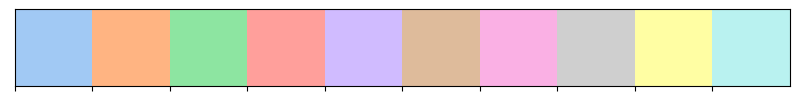

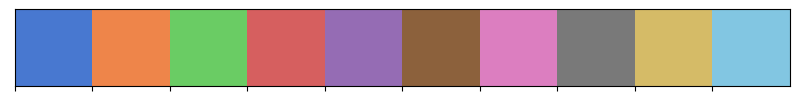

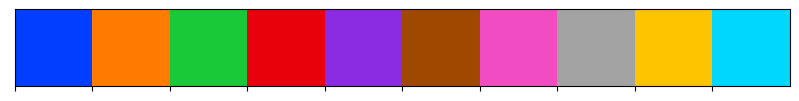

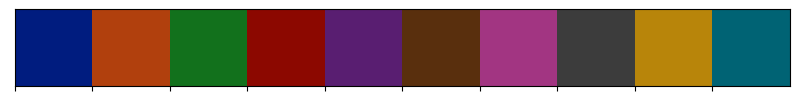

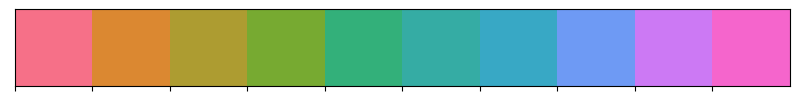

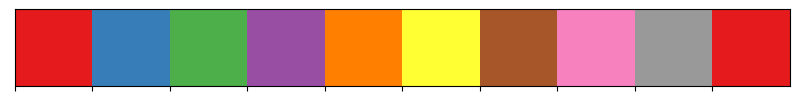

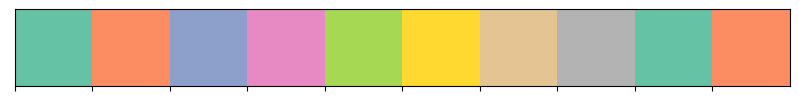

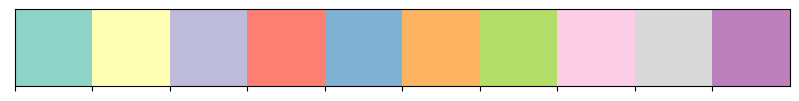

In [20]:
sns.palplot(sns.color_palette("pastel", 10))
sns.palplot(sns.color_palette("muted", 10))
sns.palplot(sns.color_palette("bright", 10))
sns.palplot(sns.color_palette("dark", 10))
sns.palplot(sns.color_palette("husl", 10))
sns.palplot(sns.color_palette("Set1", 10))
sns.palplot(sns.color_palette("Set2", 10))
sns.palplot(sns.color_palette("Set3", 10))

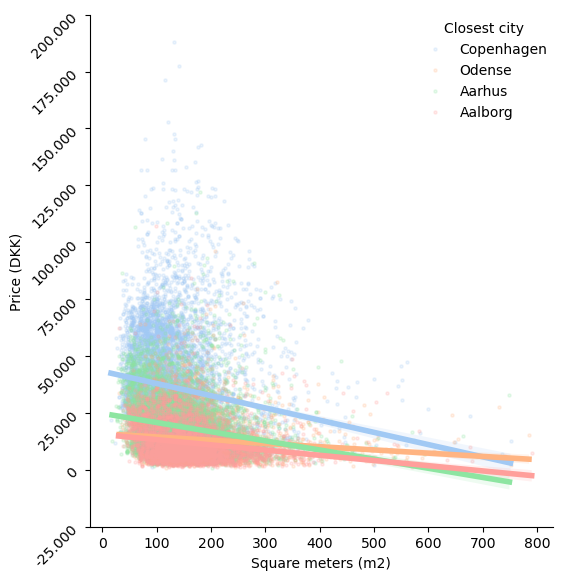

In [104]:

df_sup = df[df['closest city']=='Copenhagen']


# Create a new column indicating whether 'a' is present
df['Near Copenhagen'] = df['closest city'].str.contains('Copenhagen')

# Set up the relplot with hue parameter
ax = sns.lmplot(
    data=df,
    x="area", y="sqm_price", hue="closest city", scatter_kws={'alpha': 0.2,'s': 5,'marker':'o'},line_kws={'linewidth': 4},
    height=5
)
ax.set_axis_labels("Square meters (m2)", "Price (DKK)")
# Choose title for 'plot'
# Apply the custom formatter to the y-axis
ax.set_yticklabels(['{:,.0f}'.format(x) for x in ax.ax.yaxis.get_majorticklocs()])
ax.ax.yaxis.set_major_formatter(mticker.FuncFormatter(format_thousands))
plt.yticks(rotation = 45)
ax._legend.set_title("Closest city")
#ax.set(ylim=(0, 120000))
#new_y_ticks = [0, 15000, 30000, 45000, 60000, 75000, 90000,105000,120000]
#ax.ax.yaxis.set_ticks(new_y_ticks)

legend = ax._legend
legend.set_bbox_to_anchor(([0.7, 0.6, 0, 0.5]))  # Adjust the position as needed
figure = plt.gcf()

figure.set_size_inches(8, 6)
# when saving, specify the DPI
plt.savefig('pricem2_to_m2.png',dpi=100)

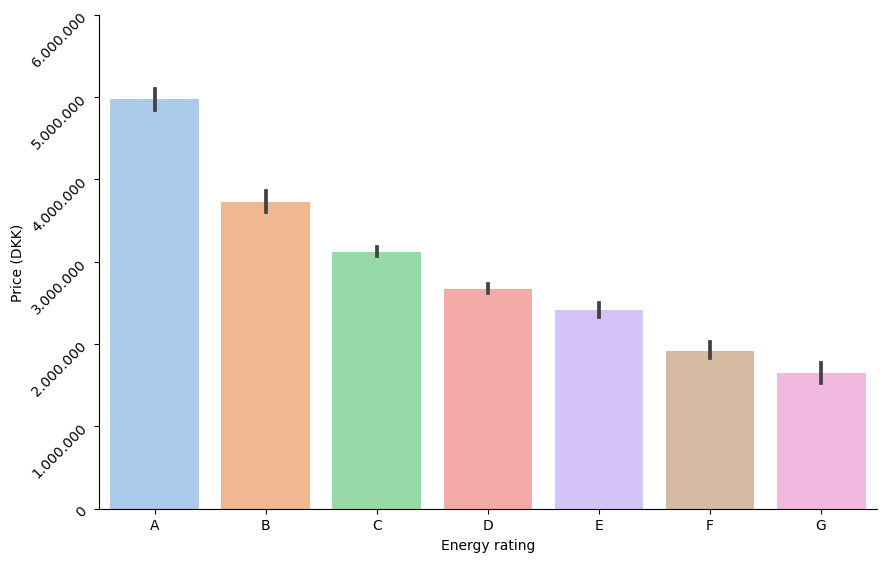

In [100]:


# Define the desired order of categories
desired_order = ['A', 'B', 'C','D','E','F','G']

# Set the categorical column with desired order
df['energy'] = pd.Categorical(df['energy'], categories=desired_order, ordered=True)



# Create the bar plot with error bars
ax = sns.catplot(data=df, x="energy", y="price", kind="bar")

# Apply the custom formatter to the y-axis
ax.set_yticklabels(['{:,.0f}'.format(x) for x in ax.ax.yaxis.get_majorticklocs()])
ax.ax.yaxis.set_major_formatter(mticker.FuncFormatter(format_thousands))
plt.yticks(rotation = 45)

# Set custom axis labels
ax.set_axis_labels("Energy rating", "Price (DKK)")
figure = plt.gcf()

figure.set_size_inches(9, 6)
# when saving, specify the DPI
plt.savefig('price_to_energy.png',dpi=100)

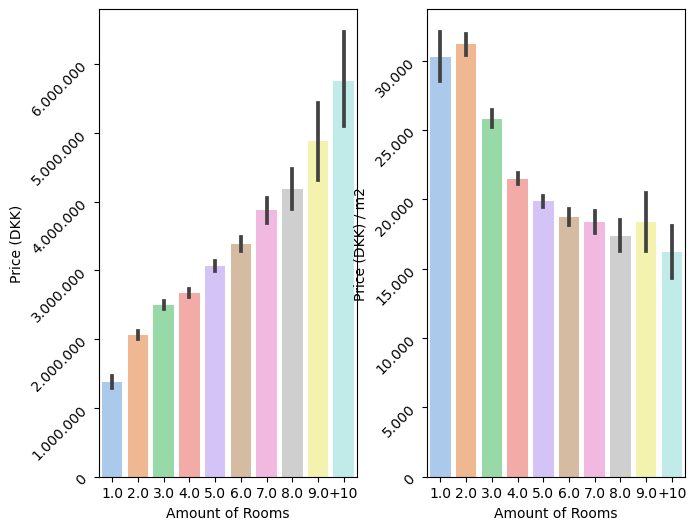

In [101]:
import matplotlib.ticker as mticker
# Custom function to transform values
def transform_values(value):
    if float(value) <= 10:
        return value
    else:
        return '+10'
sns.set_palette("pastel")

df_rooms = df

df_rooms['rooms'] = df['rooms'].astype(str)

# Apply the custom function to the 'values' column
df_rooms['rooms_group'] = df_rooms['rooms'].apply(transform_values)
# Define the desired order of categories
desired_order = ['1.0', '2.0', '3.0','4.0','5.0','6.0','7.0','8.0','9.0','+10']

# Set the categorical column with desired order
df_rooms['rooms_group'] = pd.Categorical(df_rooms['rooms_group'], categories=desired_order, ordered=True)

df_rooms['rooms_group'] = df_rooms['rooms_group'].replace('.0','')

# Create the bar plot
f,ax = plt.subplots(1,2, figsize=(10,4))
sns.barplot(data=df_rooms, x="rooms_group", y="price",estimator=np.mean,ax=ax[0])
sns.barplot(data=df_rooms, x="rooms_group", y="sqm_price",estimator=np.mean,ax=ax[1])

ax[0].set_xlabel('Amount of Rooms') # Choose title for plot
ax[1].set_xlabel('Amount of Rooms') # Choose title for plot

ax[0].set_ylabel('Price (DKK)') # Choose title for plot
ax[1].set_ylabel('Price (DKK) / m2') # Choose title for plot
ax[0].xaxis.label.set_fontsize(10)
ax[1].xaxis.label.set_fontsize(10)
# Adjust the layout to make room for y-label on the right
plt.subplots_adjust(right=0.85)

# Create space for the y-label on the right
f.tight_layout(rect=[0, 0, 0.8, 1])

ax[0].yaxis.set_major_formatter(formatter)
ax[1].yaxis.set_major_formatter(formatter)

# Rotate y-axis tick labels for better visibility
ax[0].tick_params(axis='y', labelrotation=45)
ax[1].tick_params(axis='y', labelrotation=45)

figure = plt.gcf()

figure.set_size_inches(8, 6)
# when saving, specify the DPI
plt.savefig('price_pricem2_to_rooms.png',dpi=100)

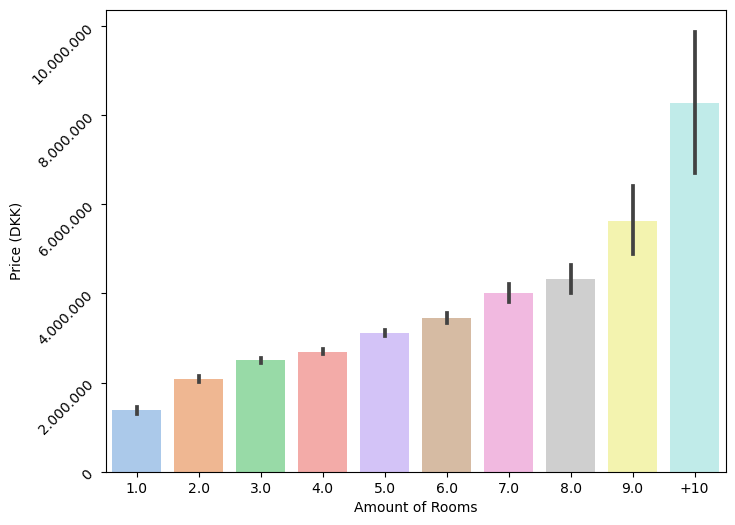

In [136]:

# Create the bar plot
ax = sns.barplot(data=df_rooms, x="rooms_group", y="price",estimator=np.mean)

ax.set_xlabel('Amount of Rooms') # Choose title for plot


ax.set_ylabel('Price (DKK)') # Choose title for plot
ax.xaxis.label.set_fontsize(10)

ax.yaxis.set_major_formatter(formatter)

# Rotate y-axis tick labels for better visibility
ax.tick_params(axis='y', labelrotation=45)

figure = plt.gcf()

figure.set_size_inches(8, 6)
# when saving, specify the DPI
plt.savefig('price_to_rooms.png',dpi=100)


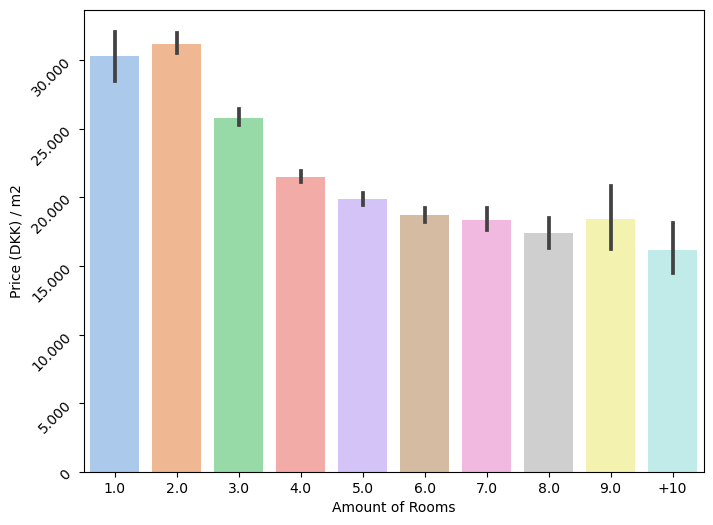

In [102]:
# Create the bar plot
ax = sns.barplot(data=df_rooms, x="rooms_group", y="sqm_price",estimator=np.mean)

ax.set_xlabel('Amount of Rooms') # Choose title for plot


ax.set_ylabel('Price (DKK) / m2') # Choose title for plot
ax.xaxis.label.set_fontsize(10)

ax.yaxis.set_major_formatter(formatter)

# Rotate y-axis tick labels for better visibility
ax.tick_params(axis='y', labelrotation=45)

figure = plt.gcf()

figure.set_size_inches(8, 6)
# when saving, specify the DPI
plt.savefig('pricem2_to_rooms.png',dpi=100)